In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import numpy.random as r
import math
import os

In [2]:
def modulo_2pi(num):
    result = num % (2 * math.pi)
    if result > math.pi:
        result -= 2 * math.pi
    elif result <= -math.pi:
        result += 2 * math.pi
    return result

def V(x,t):
    return 0



def phi(x,alpha):
    if abs(x-1)<dx*5:
        return -alpha/(dx*10)
    return 0

def search_time(ts,t):
    begin=0
    end=len(ts)-1
    if t<ts[0] or t>ts[-1]:
        print("error!")
        
    while(begin<=end):
        mid=int((begin+end)/2)
        if ts[mid]==t:
            return mid
        elif ts[mid]>t:
            end=mid-1
        else:
            begin=mid+1
    return mid

Text(0, 0.5, '$\\theta(t)/\\pi$')

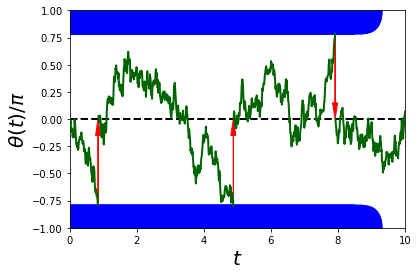

In [3]:
s=0.1 #s=dt/dx**2
dx=0.05#space discretization step

dt=0.01#time discretization step

D=1#rotational diffusion coefficient
tf=10 #total time
X=np.pi#domain of definition is [-X,X]

r.seed(134545)#12345


n_rep=1 #number of trajectory to be plotted


tp=[] #positive boundary - time coordinate
tm=[] #negative boundary - time coordinate
bp=[] #positive boundary - space (angle) coordinate
bm=[] #negative boundary - space (angle) coordinate

#read boundary data from file (use numerical_integration.py to generate data)

fp=open("boundary_p_0.01.txt",'r')
fm=open("boundary_m_0.01.txt",'r')

text=fp.read()

for t in text.split('\n'):
    if t!='':
        tp.append(float(t.split('\t')[0]))
        bp.append(float(t.split('\t')[1])/np.pi)

fp.close()

text=fm.read()

for t in text.split('\n'):
    if t!='':
        tm.append(float(t.split('\t')[0]))
        bm.append(float(t.split('\t')[1])/np.pi)

fm.close()

tp.reverse()
tm.reverse()
bp.reverse()
bm.reverse()


#generate trajectories and plot result

X=[0]
Y=[0]

plt.fill_between(tp, bp,1,color='blue')

plt.fill_between(tm, -1,bm,color='blue')
arrows=[]
for i in range(n_rep):
    X=[0]
    Y=[0]
    x=[0]
    t=[0]
    xpl=[0]
    tpl=[0]
    while(t[-1]<tf):
        flag=0
        if t[-1]>tm[0] and t[-1]<tm[-1]:
            ind=search_time(tm, t[-1])
            if x[-1]<bm[ind]*np.pi:
                x.append(0)
                flag=1
                arrows.append([tpl[-1], xpl[-1]/np.pi,-xpl[-1]/np.pi-0.15])
                plt.plot(tpl,[z/np.pi for z in xpl],linewidth=2,color='darkgreen',zorder=3)
                xpl=[]
                tpl=[]
             
                
        if t[-1]>tp[0] and t[-1]<tp[-1]:
            ind=search_time(tp, t[-1])
            if x[-1]>bp[ind]*np.pi:
                x.append(0)
                flag=1
                arrows.append([tpl[-1], xpl[-1]/np.pi,-xpl[-1]/np.pi+0.15])
                plt.plot(tpl,[z/np.pi for z in xpl],linewidth=2,color='darkgreen',zorder=3)
                

                xpl=[]
                tpl=[]
        if flag==0:
            x.append(modulo_2pi(x[-1]+np.sqrt(2*D*dt)*r.normal()))
        t.append(t[-1]+dt)
        X.append(X[-1]+dt*np.cos(x[-1]))
        Y.append(Y[-1]+dt*np.sin(x[-1]))
        tpl.append(t[-1])
        xpl.append(x[-1])
        
    plt.plot(tpl,[z/np.pi for z in xpl],linewidth=2,color='darkgreen',zorder=3)    
    #plt.plot(X,Y,linewidth=2)
        
    #plt.plot(t,[z/np.pi for z in x],linewidth=1,color='red')

plt.plot(t,[0 for z in t],linestyle='--',color='black',linewidth=2)

for [x,y,d] in arrows:
    plt.arrow(x, y, 0, d,linewidth=1, head_width=0.15, head_length=0.15, fc='red', ec='red',zorder=1)
    
plt.ylim(-1,1)
plt.xlim(0,10)

plt.xlabel(r'$t$', size=20)
plt.ylabel(r'$\theta(t)/\pi$', size=20)

